### <span style="color:orange">Import useful modules</span>

In [1]:
import numpy as np
from scipy import constants as sc
from scipy import special as ssp
import matplotlib.pyplot as plt
import matplotlib

In [2]:
def sciprint(a):
    print(f"{a:0.2g}")

# <span style="color:orange">The Stokes equation & the Airy functions</span>

## The Airy functions (maths)

The Stokes equation is most commonly written:

$$
y'' - xy = 0
$$

and has for solutions: 

$$
y(x) = \alpha A_i(x) + \beta B_i(x)
$$

where $A_i(x)$ and $B_i(x)$ are the Airy functions, and $a$ and $b$ are constants that we can find by using the boundary conditions.

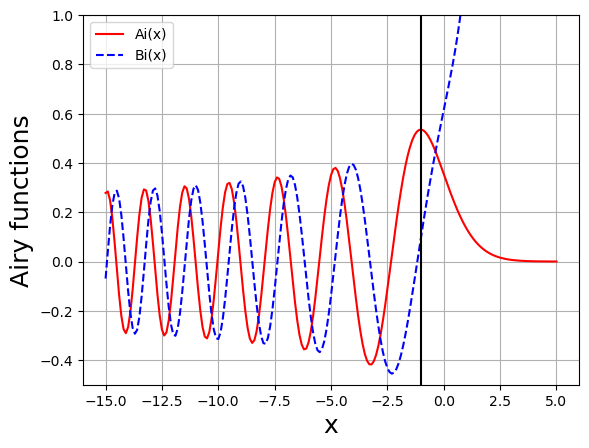

In [4]:
from scipy import special
x = np.linspace(-15, 5, 201)
ai, aip, bi, bip = special.airy(x)

import matplotlib.pyplot as plt
plt.plot(x, ai, 'r', label='Ai(x)')
plt.plot(x, bi, 'b--', label='Bi(x)')
plt.ylim(-0.5, 1.0)
plt.xlabel("x", fontsize=18)
plt.ylabel("Airy functions", fontsize=18)
plt.grid()
plt.legend(loc='upper left')


plt.axvline(-1, color="black")

plt.show()

**Note:** The maximum of $A_i(x)$ can be found at $x = -1$

## The electric field (physics)

We have
$$
\boxed{
\frac{d^2 E_0}{dx^2} + k_0^2 \left( \frac{x}{L} \right) E_0 = 0
}
$$

which can rewrite in the common form of the Stokes equation:
$$
\boxed{
\frac{d^2 E_0}{d \xi^2} - \xi E_0 = 0  \ \ \ \text{ with    } \xi = - k_0^{2/3} L^{-1/3} x
}
$$


Therefore, we have

$$
\boxed{
E_0 = \alpha A_i(\xi) + \beta B_i(\xi)
}
$$
or, more directly:
$$
\boxed{
E_0 = \alpha A_i(- k_0^{2/3} L^{-1/3} x) + \beta B_i(- k_0^{2/3} L^{-1/3} x)
}
$$

### Let us see what this looks like

In [5]:
#free space
lambda_0 = 0.2
L = 5

k0 = 2*sc.pi / lambda_0

xmax = L
xmin = -5
N = int(20*(xmax-xmin)*k0) #number of points (this formula gives you enough points per period)
x = np.linspace(xmax, xmin, N)

xi = -k0**(2/3)*L**(-1/3)*x    
Ai, _, Bi, _ = ssp.airy(xi)

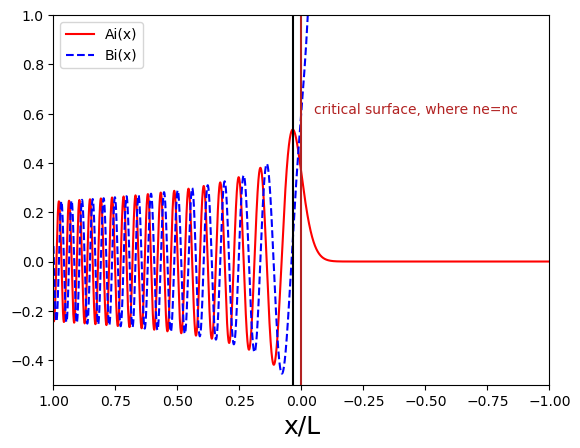

In [7]:
fig, ax = plt.subplots()

ax.plot(x/L, Ai, 'r', label='Ai(x)')
ax.plot(x/L, Bi, 'b--', label='Bi(x)')
ax.set_ylim([-0.5, 1.0])
ax.set_xlim([xmax/L, xmin/L])

plt.axvline(L**1/3 * k0**(-2/3) / L, color="black")

plt.axvline(0, color="firebrick")
plt.text(-0.05, 0.6, 'critical surface, where ne=nc', color="firebrick")

plt.xlabel("x/L", fontsize=18)
plt.legend(loc='upper left')
plt.show()

**Note:** The maximum of $A_i(\xi)$ can be found at $\xi_{max} = -1$.

This corresponds to $-k_0^{2/3} L^{-1/3} x_{max} = 1$, _i.e._ $\boxed{x_{max} = L^{1/3} k_0^{-2/3}}$

### Finding $\alpha$ and $\beta$: Boundary conditions

#### Finding $\beta$: avoiding non-physical results

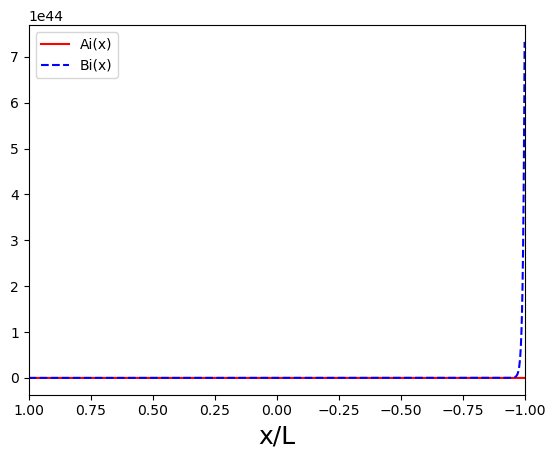

In [8]:
fig, ax = plt.subplots()

ax.plot(x/L, Ai, 'r', label='Ai(x)')
ax.plot(x/L, Bi, 'b--', label='Bi(x)')
# ax.set_ylim([-0.5, 1.0])
ax.set_xlim([xmax/L, xmin/L])

plt.xlabel("x/L", fontsize=18)
plt.legend(loc='upper left')
plt.show()

Clearly, we should have: $\beta = 0$.

Otherwise the electric field would go to infinity around the critical density.

This leaves us with:

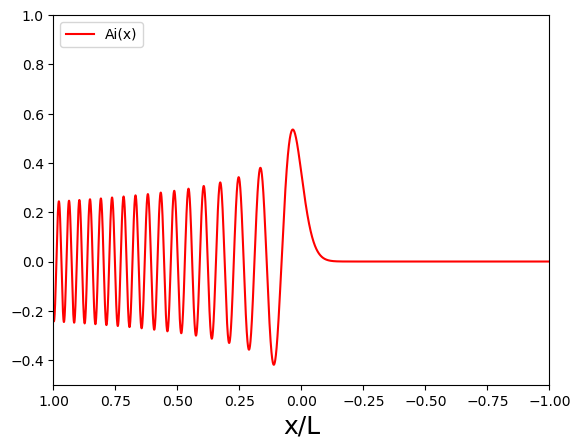

In [9]:
fig, ax = plt.subplots()

ax.plot(x/L, Ai, 'r', label='Ai(x)')
ax.set_ylim([-0.5, 1.0])
ax.set_xlim([xmax/L, xmin/L])

plt.xlabel("x/L", fontsize=18)
plt.legend(loc='upper left')
plt.show()

#### Finding $\alpha$: the boundary with free space

Remember how we got here: $n_e = n_C \left(1 -\frac{x}{L} \right)$

From this, we can define "free space" as $x \geq L$.

Therefore, we need to match a free wave with our Airy solution, at $x = L$.

We can define our free wave as:

$$E_0(x \geq L) = \tilde{E_0}_{FS} e^{-i (k_0 x + \phi)}$$

We will just consider the real part of this:

$$E_0(x \geq L) = \tilde{E_0}_{FS} \cos\left( k_0 x + \phi \right)$$

We want:

$$
\tilde{E_0}_{FS} \cos\left( k_0 L + \phi \right) = \alpha A_i(- k_0^{2/3} L^{-1/3} L)
$$

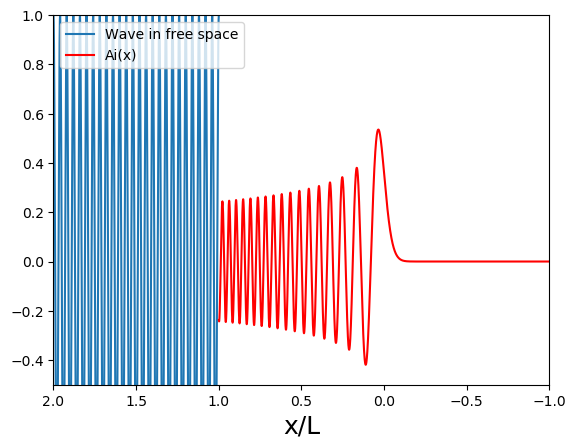

In [10]:
xmax = 2*L
xmin = -5
N = int(20*(xmax-xmin)*k0) #number of points (this formula gives you enough points per period)
x = np.linspace(xmax, xmin, N)

x_under_L = np.array([xj for xj in x if xj < L])
x_over_L  = np.array([xj for xj in x if xj >= L])

xi = -k0**(2/3)*L**(-1/3)*x_under_L
Ai, _, Bi, _ = ssp.airy(xi)

#Free wave
E0_FS = 1
phi = 0
E0 = E0_FS*np.cos(k0*x_over_L + phi)

fig, ax = plt.subplots()

ax.plot(x_over_L/L, E0, label='Wave in free space')
ax.plot(x_under_L/L, Ai, 'r', label='Ai(x)')
ax.set_ylim([-0.5, 1.0])
ax.set_xlim([xmax/L, xmin/L])

plt.xlabel("x/L", fontsize=18)
plt.legend(loc='upper left')
plt.show()

In order to match these two, we would need to match both phase and amplitude.
For the sake of this lecture, we will declar ourselves satisfy with just amplitude.

<IPython.core.display.Javascript object>


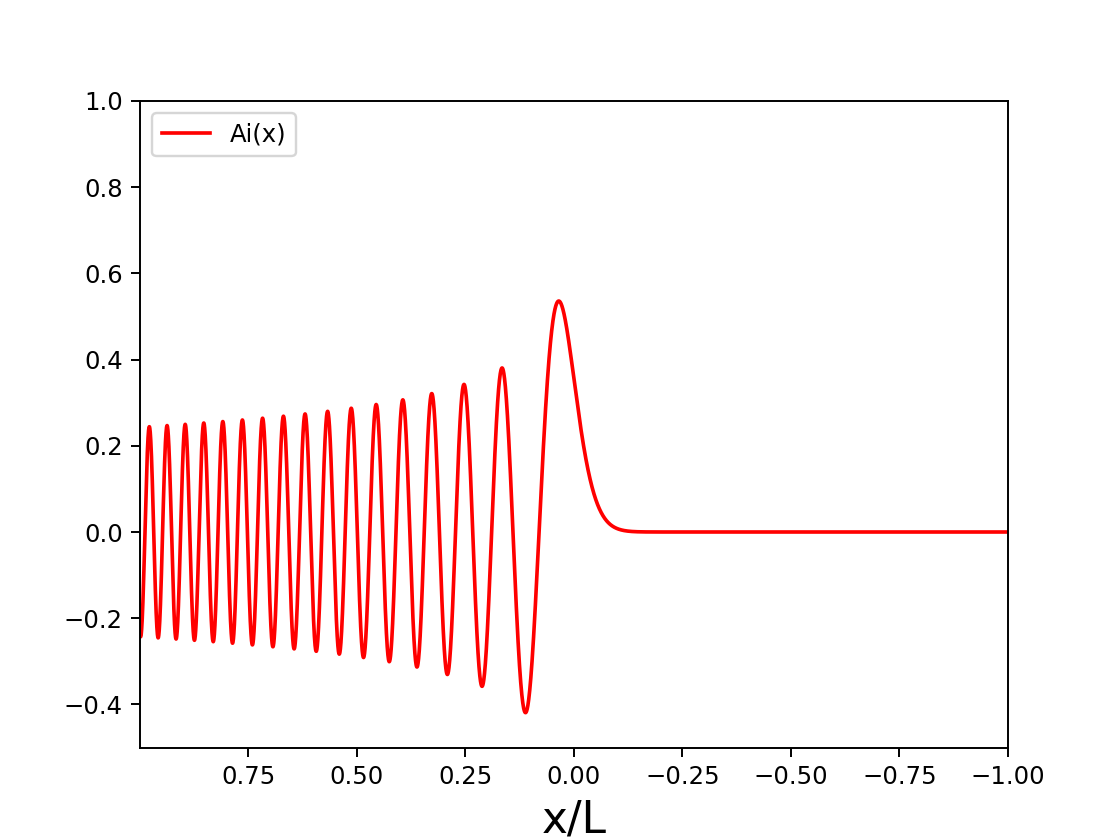

By clicking on the figure, try and estimate the amplitude of the Airy functions at the maximum x value (on the left handside)


In [11]:
#necessary to interact with figure
%matplotlib notebook 

fig, ax = plt.subplots()

ax.plot(x_under_L/L, Ai, 'r', label='Ai(x)')
ax.set_ylim([-0.5, 1.0])
ax.set_xlim([max(x_under_L)/L, xmin/L])

plt.xlabel("x/L", fontsize=18)
plt.legend(loc='upper left')
plt.show()

coords = []

def onclick(event):
    global ix, iy
    ix, iy = event.xdata, event.ydata
    print('x = %d, y = %d', ix, iy)

    global coords
    coords.append((ix, iy))

    if len(coords) == 2:
        fig.canvas.mpl_disconnect(cid)
    
    return coords

#necessary to interact with figure
print("By clicking on the figure, try and estimate the amplitude of the Airy functions at the maximum x value (on the left handside)")
cid = fig.canvas.mpl_connect('button_press_event', onclick)

In [12]:
amplitude_at_FS = coords[0][1]
print(amplitude_at_FS)
alpha = 1/amplitude_at_FS

Ai, _, Bi, _ = ssp.airy(xi)
E = alpha*Ai

0.247238827990247


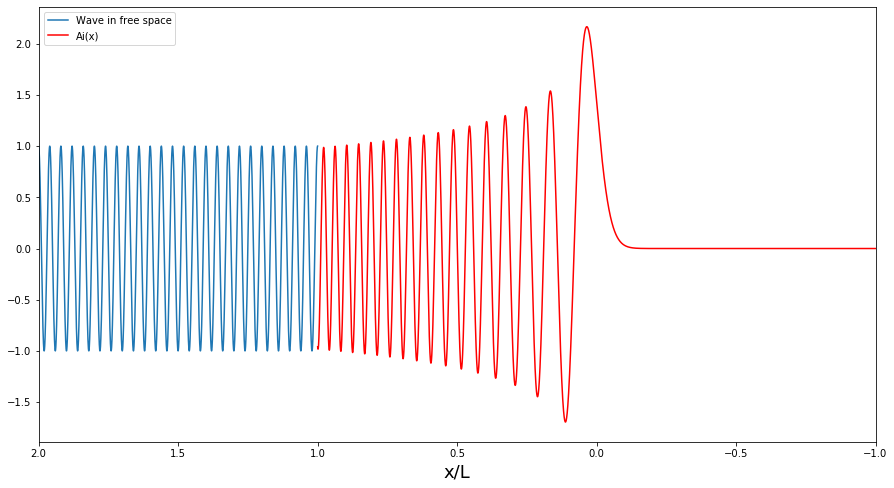

In [13]:
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (15, 8)

fig, ax = plt.subplots()

ax.plot(x_over_L/L, E0, label='Wave in free space')
ax.plot(x_under_L/L, E, 'r', label='Ai(x)')
ax.set_xlim([xmax/L, xmin/L])

plt.xlabel("x/L", fontsize=18)
plt.legend(loc='upper left')
plt.show()